![sales analysis](2020062201I.png)

# Analysis of Mid-Month Sales Decline for Flipkart

## Objective: To identify the reasons behind the observed decrese in customer purchase in the middle of the month and propose actionable solutions to address this issue 

## Project Scope:

- ### Data Analysis: Examine customer purchase behavior to identify patterns and factors contributing to the mid-month sales decline.
- ### Customer Segmentation: Segment customers based on their purchasing habits to determine if specific groups are more affected.
- ### Trend Analysis: Analyze historical sales data to confirm the consistency of the mid-month dip.
- ### Recommendation: Develop strategies to mitigate the mid-month decline and encourage consistent sales throughout the month.
- ### Data Requirements: To perform a comprehensive analysis, the following data will be provide:
    - #### Sale Data: Detailed transaction data including date, time , product details and purchase amounts for te past 12 months.

## Importing Depandencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Load the Data

In [2]:
sales_data=pd.read_csv('Retail Sales Dataset_exported.csv')

## Preview the dataset

In [3]:
sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24 00:00:00.000,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27 00:00:00.000,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13 00:00:00.000,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21 00:00:00.000,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06 00:00:00.000,CUST005,Male,30,Beauty,2,50,100


### Preview shape of data

In [4]:
sales_data.shape

(1000, 9)

### Display datatypes in the dataset

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**We can see that "Date" column is in object format. We need to change that while preprocessing the data, It is suppose to be date time object**

### Preview the dicriptive view of data

In [6]:
sales_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Data Preprocessing

### Convert the date column to datetime format

In [7]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])

### Check for missing values

In [8]:
print(sales_data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


**As we can see the result there is zero missing values in our data**

### Check for duplicate values

In [9]:
print("# Duplicates: ",sales_data.duplicated().sum())

# Duplicates:  0


## Trend Analysis

### Extract month and day from the date

In [10]:
sales_data['Month'] = sales_data['Date'].dt.month

In [11]:
sales_data['Day'] = sales_data['Date'].dt.day

### Aggregate sales by day of the month

In [12]:
daily_sales= sales_data.groupby('Day')['Total Amount'].sum()

### Visualize the daily sales trend

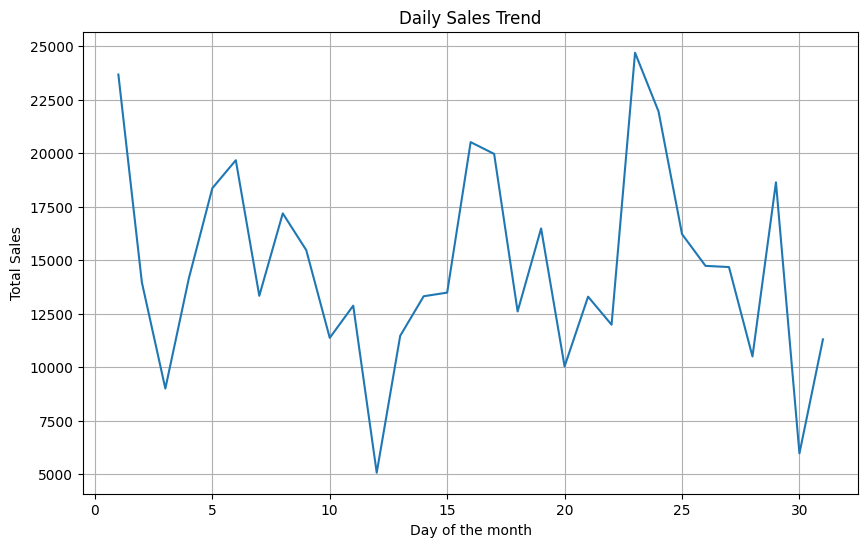

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel('Day of the month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Observations

1. ### Sales Fluctuations:
    - The Sales trend shows significant fluctuations throughout the month. There are notable **peaks** and **valleys**, indicating variable daily sales.
2. ### High points:
    - The highest sales peak is observed on the 1st da of the month, reaching close to 25,000 units.
    - Another prominent peak is around the 20th and 22th day of the month, with sales reaching approximately 22,500 to 25,000 units.
3. ### Low points:
    - The lowest sales point occures around the 11th day of the month, with saless dropping to around 5,000 units
    - Another notable dip is observed near the end of the Month, around the 30th daya, with sales again dropping close to 5,000 units.
4. ### Mid-Month Behavior:
    - The middle of the month( from around the 10th to 20th day) shows a mix of moderate peaks and deep valleys, suggesting inconsistent sales patterns.
5. ### General Trend:
    - There isn't a clear upward or downward trend over the course of the month. Instead, the sales trend is highly variable, with no apparent pattern or seasonality within the month
6. ### Possible Insights:
    - The high sales on the 1st day could indicate a strong start to the month, possibly due to initial restocking or promotional activities.
    - The dip in the middle of the month might suggest a period of lower demand or iventory shortages.
    - The variability suggest that external factors, such as promotions, market events, or supply chain issues, could be influencing daily sales.

## Customer Segmentation

### Aggregate sales by customers

In [14]:
customer_sales = sales_data.groupby('Customer ID')['Total Amount'].sum().reset_index()

### Visualizing customer sales ditribution

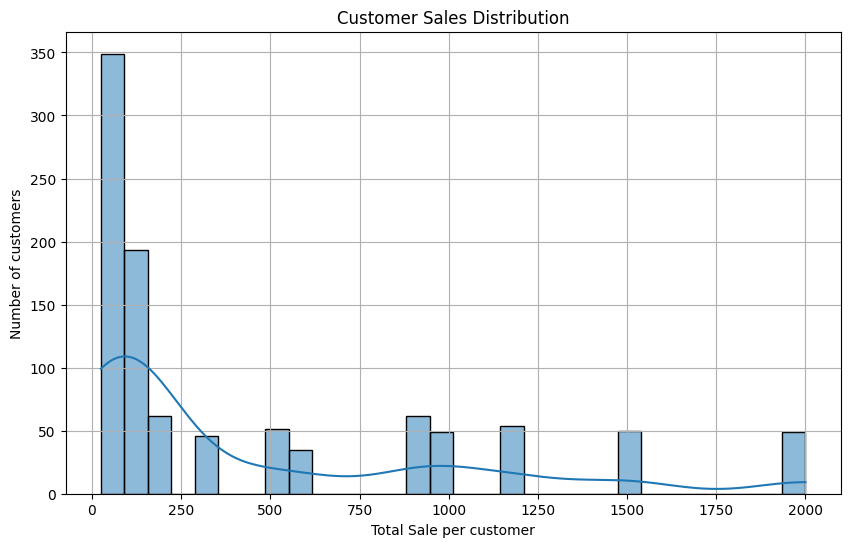

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(customer_sales['Total Amount'], bins=30, kde=True)
plt.title('Customer Sales Distribution')
plt.xlabel('Total Sale per customer')
plt.ylabel('Number of customers')
plt.grid(True)
plt.show()

## Observations
1. ### Majority of Customers
    - The majority of customers have low total sales. Specifically, the highest number of customers fall within the 0-250 sales range, with over 350 customers in this category.
2. ### Sales Distribution:
    - The histogram shows a Right-Skewed distribution. Most customers have lower sales, with the frequency decreasing as total sales per customer increasing.
3. ### Sales Bins:
    - The second highest number of customers falls within the 250-500 sales range, with around 150 customers.
    - There are smaller peaks at higher sales range such as 750-1000, 1000-1250, and 1500-1750, each having around 50 customers.
    - The sales range 1750-2000 also has a small peak with around 50 customers
4. ### Long Tail:
    - There is a long tail in the distribution, indicating that a smaller number of customers have significatly higher sales
    - While the number of customers significatly drops after 250, there are still notable numbers of customers in higher sales brackets up to 2000.
5. ### Possible Insights:
    - The concentration of customers in the lower sales range could indicate the most customers make small purchases, suggesting potential opportunities for upselling or increasing average customer spend.
    - The presence of customers in higher sales range, despite being fewer, shows that there is a segment of high-value customers. Strategies could be implemented to identify and bring up these high-value customers to enhance loyalty ad repeat business.
6. ### Strategy Implications:
    - For marketing and sales strategies, focusing on the large segment of low-sales customers to increase their spend could be beneficieal.
    - Modified approaches could be developed for the high-value customers segment to further increase their sales and maintain their loyalty.

## Product Analysis

- Identify which products are most affected by mid-month sales drops

### Aggregate sales by product and day of the month

In [16]:
product_daily_sales= sales_data.groupby(['Product Category', 'Day'])['Total Amount'].sum().unstack()

### Visualizing sales trend for top products

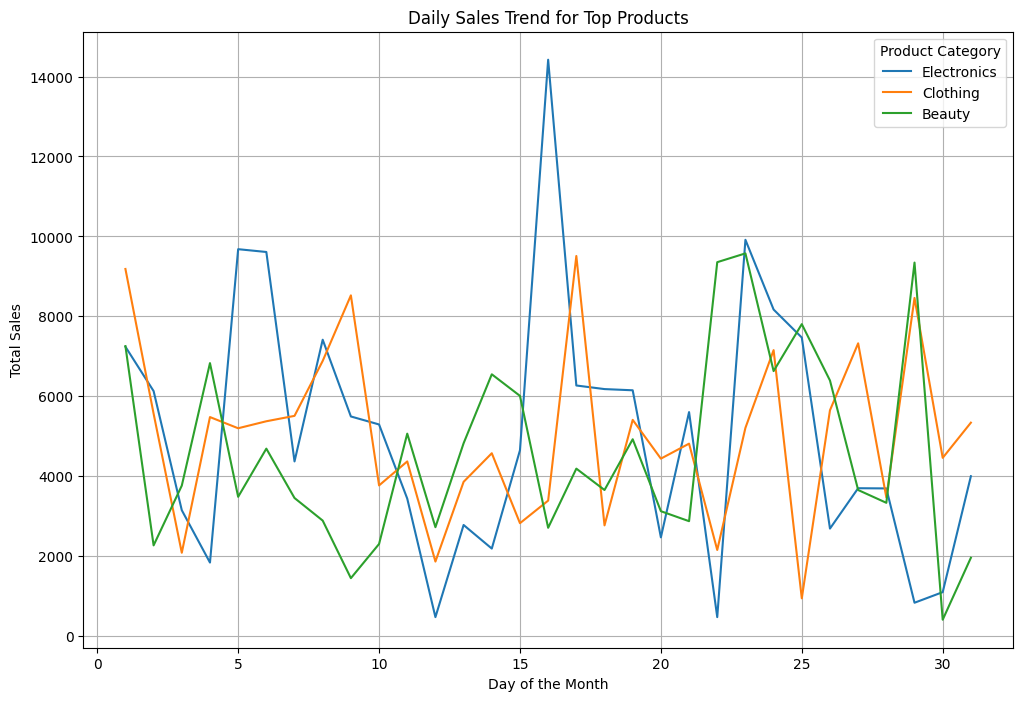

In [17]:
top_products= product_daily_sales.sum(axis=1).sort_values(ascending=False).head(5).index
product_daily_sales.loc[top_products].T.plot(figsize=(12,8))
plt.title('Daily Sales Trend for Top Products')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Observations:

## Actionable Insights

### Identify mid-month sales drop

In [18]:
mid_month_sales= daily_sales.loc[10:20].mean()

In [19]:
other_days_sales= pd.concat([daily_sales.loc[1:9], daily_sales.loc[21:31]]).mean()

In [20]:
print(f"Average mid-month sales: {mid_month_sales}")
print(f'Average other days sales: {other_days_sales}')

if mid_month_sales < other_days_sales:
    print("Sales drop observed in the middle of the month, Consider implementing mid-month promotions.")
else:
    print("No significant mid-month sales drop observed.")

Average mid-month sales: 13380.90909090909
Average other days sales: 15440.5
Sales drop observed in the middle of the month, Consider implementing mid-month promotions.


# Sales Analysis Report

## Overview
Our analysis of the sales data for the past month reveals a noticeable drop in sales during the middle of the month. The following sections provide a detailed comparison of mid-month sales versus sales on other days, and propose a strategy to address this issue.
### Sales Data Analysis
1. #### Average Sales Figures:
    - Mid-Month Sales (Days 10-20): $13,380.91
    - Other Days Sales (Days 1-9 and 21-31): $15,440.50
2. #### Sales Trend Observation:
    - A significant drop in sales is observed during the middle of the month compared to the rest of the month.
3. #### Sales Comparison:
![sales comparison](sales_comparison.jpg)
## Proposed Strategy
Given the observed sales drop during the mid-month period, it is recommended to implement targeted mid-month promotions to boost sales. Potential strategies include:

1. #### Discount Campaigns:
    - Offer special discounts or promotions from the 10th to the 20th of each month to attract more customers.
2. #### Bundling Offers:
    - Create attractive bundling offers for popular products to increase the average transaction value.

By implementing these strategies, we aim to mitigate the sales drop during the mid-month period and achieve a more consistent sales performance throughout the month.


# Implementing machine learning models for sales forecasting

Here we are going to use **ARIMA** model for the sales forcasting
## ARIMA, 
which stands for **AutoRegressive Integrated Moving Average**, is a popular statistical analysis model used for time series forecasting. It helps predict future values based on past data by combining three components:

1. ### Autoregression (AR):
    - This part of the model uses the dependency between an observation and a number of lagged observations (previous values).
2. ### Integrated (I):
    - This involves differencing the raw observations to make the time series stationary, meaning it has a constant mean and variance over time.
3. ### Moving Average (MA):
    - This component models the dependency between an observation and a residual error from a moving average model applied to lagged observations

## 1. Import Depandacies

In [24]:
import numpy as np
import itertools
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

 ## 2. Data Preparation

- Ensure your sales data is in a time series format, with consistent intervals (daily, weekly, monthly, etc.).

In [25]:
sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,6


### Selecting the required Features for ARIMA model

In [26]:
df= sales_data[['Date','Total Amount']]

In [27]:
df.head()

,Date,Total Amount
0,2023-11-24,150
1,2023-02-27,1000
2,2023-01-13,30
3,2023-05-21,500
4,2023-05-06,100


### Set the 'Date' column as the index

In [28]:
df.set_index('Date', inplace=True)

### Resample the data to monthly frequency and sum the 'Total Amount'

In [46]:
monthly_sales= df['Total Amount'].resample('ME').sum()

In [47]:
monthly_sales.head()

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
Freq: ME, Name: Total Amount, dtype: int64

## 3. Checking Stationarity

### Visualizing the data

<Axes: xlabel='Date'>

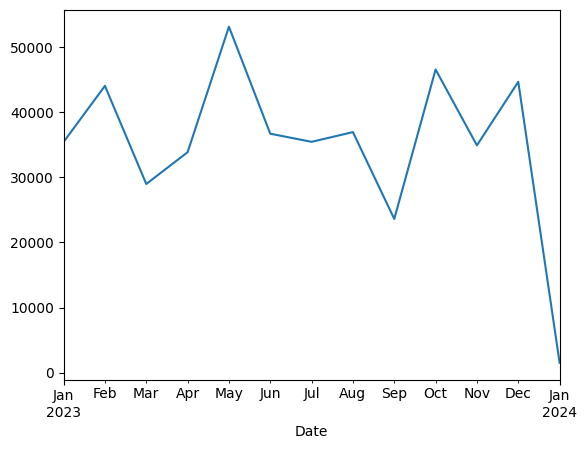

In [48]:
monthly_sales.plot()

### Adfuller Test

In [49]:
adftest=adfuller(monthly_sales)

In [50]:
print("p-value of adfuller test: ",adftest[1])

p-value of adfuller test:  0.0045522517976560595


### Findings

- Based on the provided p-value of the Augmented Dickey-Fuller (ADF) test, which is **0.0045522517976560595**, your data is indeed stationary. The p-value is less than the common significance level of 0.05, indicating that the null hypothesis of a unit root (non-stationarity) can be rejected in favor of the alternative hypothesis (stationarity).
- The line graph you provided also shows fluctuations over time, but the ADF test result is a more definitive indicator of stationarity.

## 4. Identify Parameters (p, d, q):

1. **p**: Number of lag observations (AR term).
2. **d**: Number of times the data needs to be differenced to become stationary.
3. **q**: Size of the moving average window (MA term).

### Train and Test Split

In [40]:
monthly_sales.shape

(13,)

In [51]:
train=monthly_sales[:11]
test=monthly_sales[11:]

### Derving P, D, Q

In [53]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [54]:
pdq_combination=list(itertools.product(p,d,q))

In [55]:
rmse=[]
order1=[]

In [56]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=(len(monthly_sales)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [57]:
results=pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [58]:
results.to_csv('ARIMA_result.csv')

### We found best p, d, q for the ARIMA model
- p= 0
- d= 0
- q= 3

## 5. Model Fitting

In [166]:
seasonal_model= sm.tsa.SARIMAX(train, order=(0,0,3), seasonal_order=(0,0,3,12)).fit()

## 6. Predictions 

In [167]:
pred2=seasonal_model.predict(start=len(train), end=(len(monthly_sales)-1))

In [168]:
pred2.head()

2023-12-31    15382.335864
2024-01-31     7604.873125
Freq: ME, Name: predicted_mean, dtype: float64

In [169]:
test.head()

Date
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64

## 7. Model Evaluation 

### Checking the mean squre error

In [170]:
seson_error= np.sqrt(mean_squared_error(test, pred2))
print(seson_error)

21164.15909751963


In [171]:
print(test.mean, np.sqrt(test.var()))

<bound method Series.mean of Date
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64> 30518.728676011393


In [172]:
print(pred2.mean(), np.sqrt(pred2.var()))

11493.604494493406 5499.496642842625


### Visualizing the results

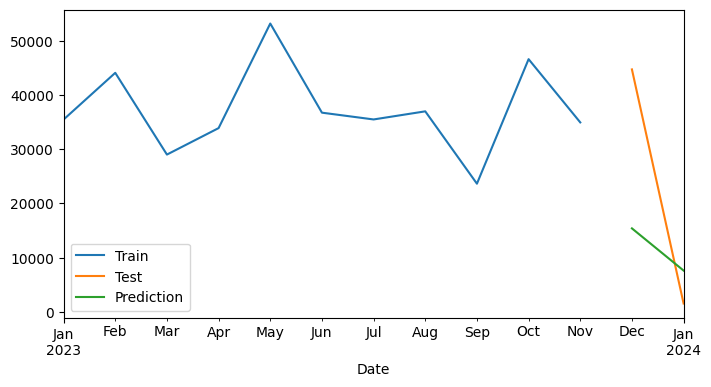

In [173]:
plt.figure(figsize=(8,4))
train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
pred2.plot(legend=True, label='Prediction')
plt.show()

## 8. Future Prediction

In [174]:
seasonal_final_model= sm.tsa.SARIMAX(monthly_sales, order=(0,0,3), seasonal_order=(0,0,3,12)).fit()

In [175]:
future_predication= seasonal_final_model.predict(start=len(monthly_sales), end=len(monthly_sales)+3)

### Visualizing the results

<Axes: xlabel='Date'>

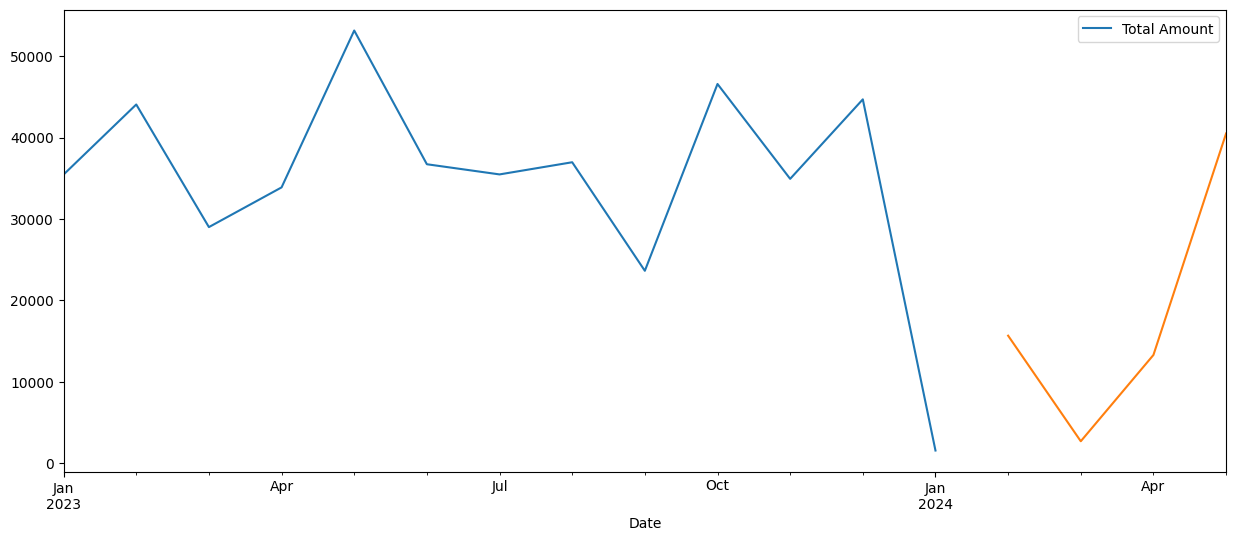

In [176]:
monthly_sales.plot(legend=True, figsize=(15,6))
future_predication.plot()

# Analysis of the Model’s Performance:

1. ### Trend Analysis:
    - **Previous Sales:** The sales data shows fluctuations with noticeable peaks and troughs, indicating variability in sales performance over the months.
    - **Predicted Sales:** The model predicts a significant upward trend in sales for the next three months. This suggests that the model expects a strong increase in sales.
2. ### Model Accuracy:
    - The steep upward trend in the orange line indicates that the model is optimistic about future sales. However, it’s important to consider the factors driving this prediction. If the model is based on seasonal trends, marketing campaigns, or other external factors, the prediction might be more reliable.
# Recommended Actions for the Next 3 Months:

1. ### Inventory Management:
    - **Increase Inventory:** Prepare sufficient inventory to meet the anticipated demand. This will help avoid stockouts and ensure that you can meet customer demand.
2. ### Marketing Efforts:
    - **Scale Up Marketing:** Capitalize on the predicted sales growth by increasing marketing efforts. This could include promotions, advertising campaigns, and targeted marketing strategies to attract more customers.
3. ### Logistics and Supply Chain:
    - **Enhance Logistics:** Ensure that your logistics and supply chain management are equipped to handle higher volumes of sales. This includes optimizing delivery processes and ensuring timely restocking.
4. ### Monitor and Adjust:
    - **Continuous Monitoring:** Keep a close eye on actual sales data as it comes in. Compare it with the predictions and adjust your strategies accordingly. If sales are not meeting expectations, investigate the reasons and take corrective actions.


**By taking these proactive steps, you can better prepare for the predicted increase in sales and maximize your business performance over the next few months.**

# <span style="color:red">Thank You!</span>